# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
def preprocessing():
    # Read the Data file
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

    # Sort values by Date
    df.sort_values(by=['Date'],inplace=True)
    df.reset_index(inplace=True, drop=True)

    # Required Period from 2005 to 2015
    last_year_index = df.loc[df['Date'] == '2015-12-31'].index.to_series().idxmax()
    df1 = df[0:last_year_index]

    # Tenth of Temperature
    df['Data_Value'] = df['Data_Value']*0.1

    # Year and Month columns
    df['Year'] = df['Date'].apply(lambda x: x[:4])
    df['Day Of Month'] = df['Date'].apply(lambda x: x[5:])

    # Step 3
    # Remove 02-29 for visualization purposes
    df = df[df['Day Of Month'] != '02-29']
    return df
preprocessing()

,ID,Date,Element,Data_Value,Year,Day Of Month
0,USW00004848,2005-01-01,TMIN,0.0,2005,01-01
1,USC00207320,2005-01-01,TMAX,15.0,2005,01-01
2,USC00207320,2005-01-01,TMIN,-1.1,2005,01-01
3,USW00014833,2005-01-01,TMIN,-4.4,2005,01-01
4,USW00014833,2005-01-01,TMAX,3.3,2005,01-01
5,USC00203712,2005-01-01,TMIN,-5.0,2005,01-01
6,USW00004848,2005-01-01,TMAX,13.3,2005,01-01
7,USC00205563,2005-01-01,TMAX,2.8,2005,01-01
8,USW00014853,2005-01-01,TMAX,5.6,2005,01-01
9,USW00094889,2005-01-01,TMIN,-5.6,2005,01-01


In [14]:
def pre_2015():
    
    data = preprocessing()
    data = data[(data.Year < "2015")]
    
    # Create a DataFrame of Max and Minimum values of Date For Data from 2005 to 2014
    Max_of_day = data[(data['Element'] == 'TMAX')].groupby(['Day Of Month'])['Data_Value'].max().to_frame()
    Min_of_day = data[(data['Element'] == 'TMIN')].groupby(['Day Of Month'])['Data_Value'].min().to_frame()
    
    # Rename Columns To concatenate it For Better Reading You Can skip concat
    Max_of_day.rename(columns = {'Data_Value': 'Max_Temp'}, inplace = True)
    Min_of_day.rename(columns = {'Data_Value': 'Min_Temp'}, inplace = True)
    Reading = pd.concat([Max_of_day ,Min_of_day], axis = 1).reset_index()
    #data = data.merge(Reading, how = 'outer' , on = 'Day Of Month')
    # Reading.set_index('Day Of Month',inplace = True)
    # data['Day Of Month'] = data['Day Of Month'].astype(float)
    return Reading
pre_2015()

,Day Of Month,Max_Temp,Min_Temp
0,01-01,15.6,-16.0
1,01-02,13.9,-26.7
2,01-03,13.3,-26.7
3,01-04,10.6,-26.1
4,01-05,12.8,-15.0
5,01-06,18.9,-26.6
6,01-07,21.7,-30.6
7,01-08,19.4,-29.4
8,01-09,17.8,-27.8
9,01-10,10.0,-25.6


In [15]:
def get_2015():
    pre2015 = pre_2015()
    data = preprocessing()
    data = data[(data.Year == '2015')]
    
    # Create a DataFrame of Max and Minimum values of Date For Data of 2015
    Max_of_day = data[(data['Element'] == 'TMAX')].groupby(['Day Of Month'])['Data_Value'].max().to_frame()
    Min_of_day = data[(data['Element'] == 'TMIN')].groupby(['Day Of Month'])['Data_Value'].min().to_frame()
    
    # Rename Columns To concatenate it For Better Reading You Can skip concat
    Max_of_day.rename(columns = {'Data_Value': 'Max_Temp_2015'}, inplace = True)
    Min_of_day.rename(columns = {'Data_Value': 'Min_Temp_2015'}, inplace = True)
    Reading_2015 = pd.concat([Max_of_day ,Min_of_day], axis = 1).reset_index()
    
    # Merge pre2015 data and 2015 
    data = pre2015.merge(Reading_2015, how = 'outer' , on = 'Day Of Month')
    
    # Determine if min or max of 2015 is more/less than pre2015
    data['extreme_2015'] = data['Max_Temp_2015'] > data['Max_Temp']
    data['least_2015'] = data['Min_Temp_2015'] < data['Min_Temp']
    data = data[(data.extreme_2015 == True) | (data.least_2015 == True)]
    return data
get_2015()

,Day Of Month,Max_Temp,Min_Temp,Max_Temp_2015,Min_Temp_2015,extreme_2015,least_2015
4,01-05,12.8,-15.0,2.8,-15.5,False,True
10,01-11,15.6,-18.3,0.6,-20.0,False,True
33,02-03,8.9,-23.2,-2.1,-23.8,False,True
39,02-09,7.8,-21.0,8.3,-11.6,True,False
44,02-14,10.6,-21.7,-2.7,-23.9,False,True
45,02-15,11.7,-25.6,-3.9,-26.0,False,True
46,02-16,14.4,-22.2,-12.1,-29.4,False,True
47,02-17,15.6,-24.3,-5.5,-27.2,False,True
49,02-19,12.8,-18.8,-5.6,-26.0,False,True
50,02-20,10.6,-17.8,-8.8,-34.3,False,True


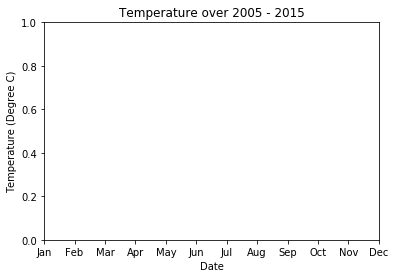

In [5]:
# Scatter Plot
%matplotlib inline
import numpy as np

# Create New Figure
plt.figure()

# Plot Formate
plt.xlabel('Date')
plt.ylabel('Temperature (Degree C)')
plt.title('Temperature over 2005 - 2015')

Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.linspace(0,11,num = 12) , Month_name)

# Get data
pre2015 = pre_2015()

# Convert string to float for data representation
#plt.plot(pre2015['Day Of Month'], pre2015['Min_Temp'], color='b', lw=0.5, label='record low 2005-2014')
#plt.plot(pre2015['Day Of Month'], pre2015['Max_Temp'], color='r', lw=0.5, label='record high 2005-2014')

# Set axis properties [xmin, xmax, ymin, ymax]
# ax.axis([0,6,0,10])